In [1]:
import json

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networks as nx
import seaborn as sb

from copia.hill import hill_numbers
from copia.utils import evenness

In [2]:
q_min, q_max, step = 0, 3, 0.1
q = np.arange(q_min, q_max + step, step)

## Network topologies:

Watts-Strogatz graph (sensu Lipo et al.):

NameError: name 'nx' is not defined

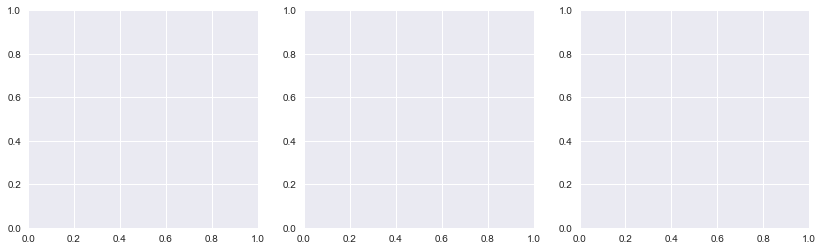

In [3]:
degrees = 2, 10, 24
n_agents = 25

fig, axes = plt.subplots(ncols=len(degrees), figsize=(14, 4))
axes = axes.flatten()

for i, degree in enumerate(degrees):
    G = nx.watts_strogatz_graph(n=25, k=degree, p=0.0, seed=n_agents)
    pos = nx.kamada_kawai_layout(G)

    nx.draw_networkx_nodes(G, pos, node_size=25, alpha=0.9, node_color="C1", ax=axes[i])
    nx.draw_networkx_edges(G, pos, alpha=0.3, ax=axes[i])
    axes[i].set_title(f'$n$ = {n_agents}, $k$ = {degree}', pad=20)
    axes[i].axis('off')

In [6]:
with open('populations.json') as f:
    populations = json.loads(f.read())

In [ ]:
evenness_data, evenness_cv_data = [], []
q1, q2, q3 = [int(i / step) for i in (1, 2, 3)]
    
fig, ax = plt.subplots(figsize=(15, 10))

for k_idx, k in enumerate(populations.keys()):
    for p_idx, p in enumerate(populations[k]):
        try:
            _, counts = np.unique(p, return_counts=True)
            emp, _ = hill_numbers(counts, n_iter=1)
            even = evenness(emp)
            even_cv = evenness(emp, CV=True)
            
            # plot
            if p_idx == 0:
                ax.plot(q, even, c=f"C{k_idx}", linewidth=2, alpha=0.3, label=f'degree = {k}')
            else:
                ax.plot(q, even, c=f"C{k_idx}", linewidth=2, alpha=0.2)
                
            # collect evenness at various values for q:
            evenness_data.append((k, even[q1], even[q2], even[q3]))
            evenness_cv_data.append((k, even_cv[q1], even_cv[q2], even_cv[q3]))
            
        except ValueError:
            pass

ax.set_xlabel('Diversity order ($q$)')
ax.set_ylabel(r'Evenness: $({}^qD - 1) / (\hat{S} - 1)$')
ax.set_title('Evenness profile')
plt.legend();

In [8]:
df = pd.DataFrame(evenness_data, columns=('k', 'q1', 'q2', 'q3'))
k_dtype = pd.CategoricalDtype(sorted(set(df['k'])), ordered=True)
df['k'] = df['k'].astype(k_dtype)
df

,k,q1,q2,q3
0,10,0.497307,0.410147,0.371299
1,10,0.519830,0.389367,0.320322
2,10,0.402936,0.300702,0.267903
3,10,0.670315,0.543196,0.483795
4,10,0.659873,0.517993,0.429628
5,10,0.568201,0.440359,0.375470
6,10,0.511208,0.369958,0.304053
7,10,0.455182,0.345679,0.296910
8,10,0.583170,0.474278,0.424283
9,10,0.518980,0.413707,0.364207


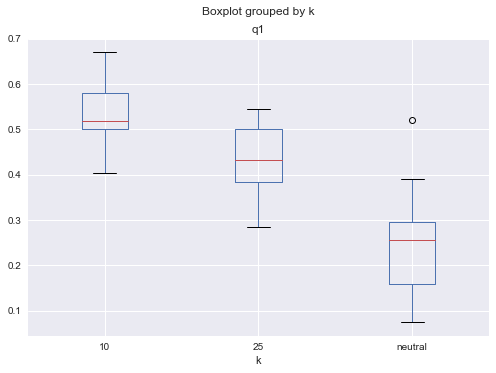

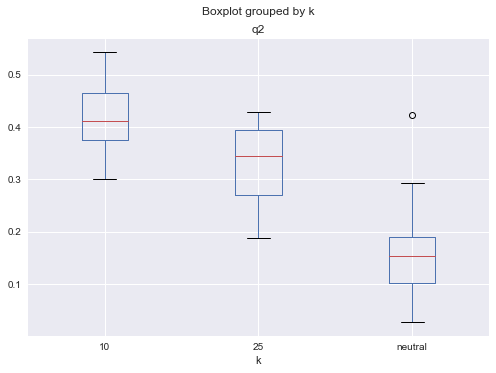

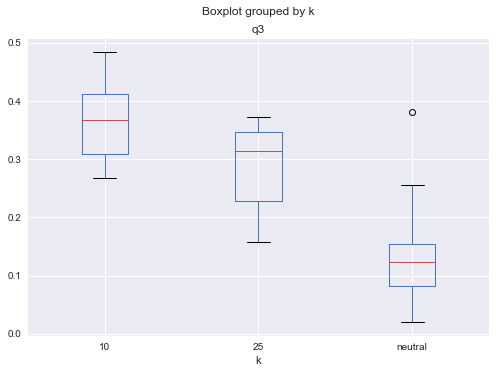

In [9]:
df.boxplot('q1', by='k');
df.boxplot('q2', by='k');
df.boxplot('q3', by='k');